## Project :  Assessing Portfolio Volatility

<p><br>In this project we will create a function to measure Volatility of Portfolio consisting of Various stocks.
    <br>Volatility is a formal measure of a stock's risk. The higher the volatlity the higher its value fluctuates.</p>
 
 <p> As a first step we will make a function to import historic data of previous one year.</p>



In [2]:
## Function for analysis and to grab historic data from web.
from pandas_datareader import data as web
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We are only intereted in Volatility, hence we only need Adj Close Values of all the Stocks.

In [3]:
def generate_dataframe(assets):
    df = pd.DataFrame()
    end_date= datetime.datetime.now()
    start_date= end_date + datetime.timedelta(-365)
    for stock in assets:
        df[stock] = web.DataReader(stock, data_source='yahoo',start=start_date ,end=end_date)['Adj Close']
    
    return df


Let's check our function, and analyse some stocks value.

In [4]:
stocks=['GOOGL','FB']
stocks_value= generate_dataframe(stocks)

In [5]:
stocks_value.head()

,GOOGL,FB
Date,,
2019-04-26,1277.420044,191.490005
2019-04-29,1296.199951,194.779999
2019-04-30,1198.959961,193.399994
2019-05-01,1173.319946,193.029999
2019-05-02,1166.510010,192.529999


In [6]:
stocks_value.describe()

,GOOGL,FB
count,252.000000,252.000000
mean,1245.583648,190.262817
std,118.239080,15.482349
min,1038.739990,146.009995
25%,1154.672485,181.682495
50%,1219.164978,189.544998
75%,1315.947449,199.759998
max,1524.869995,223.229996


Now we can clearly see min, max and quartiles of our stocks closing price.

Now let's see distribution of their daily returns and as well as correlation between them using pairplot


In [7]:
daily_return=stocks_value.pct_change()

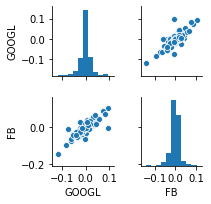

In [8]:
sns.pairplot(daily_return.dropna(),height=1.5)

Now let's calculate Volatility using covariance between different stocks.

### Calaculate Volatility

In [9]:
def volatility(df,weight):
   
    return_stock=df.pct_change()
    variance=return_stock.var(axis=0)
    covariance=return_stock.cov()
    
    variance=np.array(variance).reshape((len(weight),1))
    weights=np.array(weight).reshape((1,len(weight)))
    
    A=np.dot(weights**2,variance)
    
    b=0
    for i in range(len(weight)):
        for j in range(i):
            b+=2*weight[i]*weight[j]*covariance.iloc[i,j]
            
    
    return A+b

Enter stocks symbol	GOOGL AMZN FB TSLA NFLX
total 5 stocks
Enter corresponding Weights	0.2 0.3 0.4 0.05 0.05
Volatility of the Portfolo is	
0.04172312570742292 %


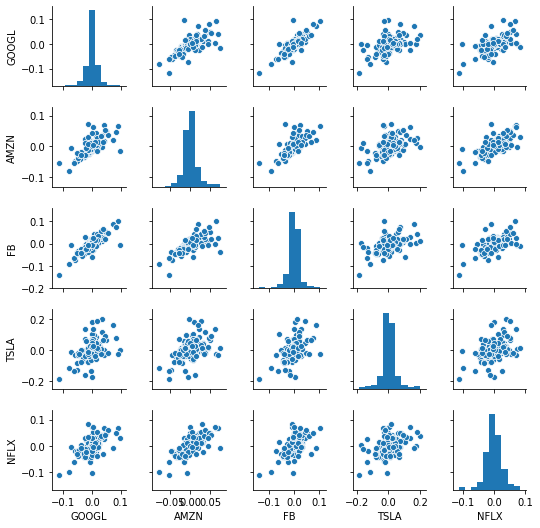

In [10]:
############################# FOR TAKING INPUTS FROM USER ############################

stocks=input("Enter stocks symbol\t").split()
count=len(stocks)
print(f'total {count} stocks')

while True:
    x=input("Enter corresponding Weights\t").split()
    weights=[float(i) for i in x]
    if sum(weights)!=1.0:
        print("sum of the weights is not 1")
    elif len(weights)!=count:
        print("len of weight is not equal to that of Stocks")
    else : break

############################# Printing Results ###################################

df=generate_dataframe(stocks)
port_volatility=volatility(df,weights)

print(f"Volatility of the Portfolo is\t")
print(f"{float(port_volatility)*100} %")
sns.pairplot(df.pct_change().dropna(),height=1.5)
